<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

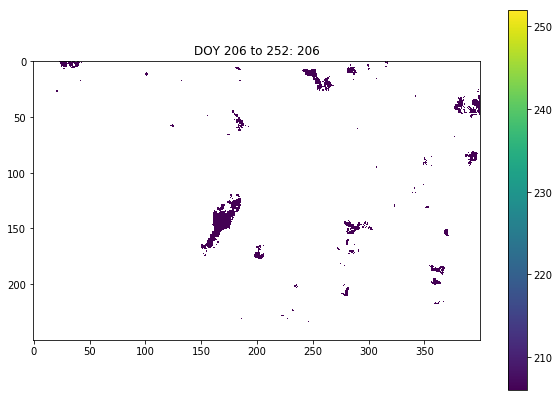

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import gdal
%matplotlib inline

'''
read fire day dataset 🔥 
'''
ifile = 'files/MCD45A1.A2008214.h19v10.005.2008279131907.hdf'
dateFile = f'HDF4_EOS:EOS_GRID:"{ifile}":MOD_GRID_Monthly_500km_BA:burndate'
dateData = gdal.Open(dateFile).ReadAsArray().astype(float)

# coordinates: image size is 2400 x 2400
y0,y1 = 0,250
x0,x1 = 2000,2400
dateData = dateData[y0:y1,x0:x1]

# remove non-data values using a mask
mask = np.ones_like(dateData).astype(bool)
mask[dateData>365]=0
mask[dateData==0]=0

# get bounds
vmin,vmax = int(np.nanmin(dateData[mask])),int(np.nanmax(dateData[mask]))
ndays = vmax-vmin

fig = plt.figure(figsize=(10,7))

def f(i):
    # sort data for frame i
    doy = int(vmin+(i*ndays)/100.)
    data = dateData.copy().astype(float)
    data[dateData>doy] = np.nan
    data[~mask] = np.nan
    return data

i = 0
im = plt.imshow(f(i), animated=True,vmin=vmin,vmax=vmax)
plt.colorbar(fraction=0.15)

def updatefig(i):
    doy = int(vmin+(i)%(ndays))
    x = f(i)
    im.set_array(x)
    plt.title(f'DOY {vmin} to {vmax}: {doy:03d}')
    return im,

ani = animation.FuncAnimation(fig, updatefig,blit=False)
HTML(ani.to_jshtml())

In [29]:
help(animation.FuncAnimation)

Help on class FuncAnimation in module matplotlib.animation:

class FuncAnimation(TimedAnimation)
 |  Makes an animation by repeatedly calling a function *func*.
 |  
 |  Parameters
 |  ----------
 |  fig : matplotlib.figure.Figure
 |     The figure object that is used to get draw, resize, and any
 |     other needed events.
 |  
 |  func : callable
 |     The function to call at each frame.  The first argument will
 |     be the next value in *frames*.   Any additional positional
 |     arguments can be supplied via the *fargs* parameter.
 |  
 |     The required signature is::
 |  
 |        def func(frame, *fargs) -> iterable_of_artists
 |  
 |     If ``blit == True``, *func* must return an iterable of all artists
 |     that were modified or created. This information is used by the blitting
 |     algorithm to determine which parts of the figure have to be updated.
 |     The return value is unused if ``blit == False`` and may be omitted in
 |     that case.
 |  
 |  frames : iterab